# Mejorando a los Dallas Mavericks utilizando EDA

<!-- <img src="img/NBA_logo.png" alt="NBA logo" width="300"/> -->

<img src="img/mavs_logo.png" alt="NBA logo" width="170"/>


La última vez que los Dallas Mavericks ganaron el anillo fue en el año 2011, liderados por Dirk Nowitzki. Sin embargo, desde su retirada, el equipo ha tenido que reinventarse y cambiar sus jugadores, con el objetivo de formar un equipo capaz de volver a lograr esta hazaña.

En este análisis, se explorarán diversos indicadores a partir de los datos recogidos en los últimos años y presentes en la [página web de la NBA](https://es.global.nba.com/statistics/). Los datos utilizados para el análisis han sido obtenidos mediante web scrapping de dicha página.


## 1. Rendimiento del equipo desde 2011.

La primera duda que nos surge al realizar un análisis del equipo, es cómo le ha ido desde que ganó su último campeonato. Para ver esto, se ha realizado un DataFrame que contiene los datos de clasificación de temporada regular entre 2011 y 2023, al que llamaremos `df_team_stats`.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.set_style("darkgrid")

# naranja primero = #e28743

colors = ["#3c5493", "#c08515", "#19233e"]

In [53]:
df_team_stats = pd.read_csv("./data/team_stats_2011_2023.csv", index_col=0)
df_team_stats

,season,ranking,team_name,games_played,wins,losses,team_win_perc,ppg,fgm,fga,...,ft_att,ft_perc,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,plus_minus
0,2023,1,Milwaukee Bucks,82,58,24,0.707,116.9,42.7,90.4,...,22.4,74.3,11.1,37.5,25.8,14.6,6.4,4.9,18.0,3.6
1,2023,2,Boston Celtics,82,57,25,0.695,117.9,42.2,88.8,...,21.6,81.2,9.7,35.6,26.7,13.4,6.4,5.2,18.8,6.5
2,2023,3,Philadelphia 76ers,82,54,28,0.659,115.2,40.8,83.8,...,25.1,83.5,8.7,32.2,25.2,13.7,7.7,4.7,20.4,4.3
3,2023,4,Denver Nuggets,82,53,29,0.646,115.8,43.6,86.4,...,22.4,75.1,10.1,32.9,28.9,14.5,7.5,4.5,18.6,3.3
4,2023,5,Cleveland Cavaliers,82,51,31,0.622,112.3,41.6,85.2,...,22.5,78.0,9.7,31.4,24.9,13.3,7.1,4.7,19.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2011,25,Sacramento Kings,82,24,58,0.293,99.4,38.2,85.1,...,24.2,73.4,13.1,30.8,20.4,16.1,7.4,4.8,22.0,-5.3
386,2011,27,Washington Wizards,82,23,59,0.280,97.3,37.2,84.0,...,24.4,74.5,12.4,29.0,19.4,15.3,8.1,6.1,22.6,-7.4
387,2011,28,Toronto Raptors,82,22,60,0.268,99.1,38.3,82.4,...,24.1,75.5,11.7,28.6,21.9,14.7,7.1,4.3,22.0,-6.3
388,2011,29,Cleveland Cavaliers,82,19,63,0.232,95.5,35.2,81.1,...,25.3,74.5,10.4,29.9,21.0,14.2,6.6,4.2,20.1,-9.0


In [54]:
df_team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 389
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         390 non-null    int64  
 1   ranking        390 non-null    int64  
 2   team_name      390 non-null    object 
 3   games_played   390 non-null    int64  
 4   wins           390 non-null    int64  
 5   losses         390 non-null    int64  
 6   team_win_perc  390 non-null    float64
 7   ppg            390 non-null    float64
 8   fgm            390 non-null    float64
 9   fga            390 non-null    float64
 10  fg_perc        390 non-null    float64
 11  threes_made    390 non-null    float64
 12  threes_att     390 non-null    float64
 13  threes_perc    390 non-null    float64
 14  ft_made        390 non-null    float64
 15  ft_att         390 non-null    float64
 16  ft_perc        390 non-null    float64
 17  off_reb        390 non-null    float64
 18  def_reb        

In [103]:
df_team_stats.describe()

,season,ranking,games_played,wins,losses,team_win_perc,fgm,fga,fg_perc,threes_made,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,2017.000000,15.205128,79.117949,39.558974,39.558974,0.499597,39.129744,85.393846,45.816410,9.639231,...,10.503590,32.935128,23.116923,14.255128,7.635385,4.861795,20.126154,105.371795,105.382051,-0.010256
std,3.746464,8.725990,5.475483,12.134862,11.983080,0.148331,2.307145,3.606858,1.604136,2.755882,...,1.244912,2.080815,2.274384,1.087726,0.829550,0.739486,1.400801,7.083949,7.023935,4.646114
min,2011.000000,1.000000,64.000000,7.000000,9.000000,0.106000,33.200000,75.800000,40.800000,3.800000,...,7.600000,27.200000,18.000000,11.100000,5.500000,2.400000,16.600000,87.000000,88.100000,-13.900000
25%,2014.000000,8.000000,82.000000,31.000000,31.000000,0.390000,37.425000,82.700000,44.700000,7.400000,...,9.600000,31.500000,21.400000,13.500000,7.100000,4.300000,19.100000,99.425000,100.225000,-3.175000
50%,2017.000000,15.000000,82.000000,41.000000,39.000000,0.512000,38.900000,85.600000,45.800000,9.750000,...,10.500000,33.100000,23.000000,14.200000,7.600000,4.800000,20.100000,104.950000,105.450000,0.300000
75%,2020.000000,23.000000,82.000000,48.000000,48.000000,0.610000,40.800000,88.100000,46.975000,11.600000,...,11.300000,34.300000,24.500000,15.000000,8.200000,5.300000,21.175000,111.675000,111.100000,3.200000
max,2023.000000,30.000000,82.000000,73.000000,72.000000,0.890000,44.700000,94.400000,50.400000,16.700000,...,14.600000,42.200000,30.400000,17.700000,10.000000,8.200000,24.800000,120.700000,123.000000,11.600000


Se observa que contiene 390 filas y no tiene ningún elemento nulo.

A continuación, vamos a comenzar a obtener métricas que nos indiquen el nivel de nuestro equipo durante estas temporadas. Empezamos por la posición del equipo en cada temporada. Recordemos que la nba se compone de 30 equipos, divididos en dos conferencias: Este y Oeste; y de cada una, tan solo se clasifican 8 para los Playoffs.

Añadimos la columna "opp_ppg" con los puntos del equipo contrario:

In [55]:
col = df_team_stats.pop('ppg')
df_team_stats.insert(len(df_team_stats.columns) - 1, "ppg", col)

opp_ppg = df_team_stats["ppg"] - df_team_stats["plus_minus"]
tot_reb = df_team_stats["off_reb"] + df_team_stats["def_reb"]

df_team_stats.insert(len(df_team_stats.columns) - 1, "opp_ppg", opp_ppg)
df_team_stats.insert(len(df_team_stats.columns) - 10, "tot_reb", tot_reb)

df_team_stats

,season,ranking,team_name,games_played,wins,losses,team_win_perc,fgm,fga,fg_perc,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
0,2023,1,Milwaukee Bucks,82,58,24,0.707,42.7,90.4,47.3,...,11.1,37.5,25.8,14.6,6.4,4.9,18.0,116.9,113.3,3.6
1,2023,2,Boston Celtics,82,57,25,0.695,42.2,88.8,47.5,...,9.7,35.6,26.7,13.4,6.4,5.2,18.8,117.9,111.4,6.5
2,2023,3,Philadelphia 76ers,82,54,28,0.659,40.8,83.8,48.7,...,8.7,32.2,25.2,13.7,7.7,4.7,20.4,115.2,110.9,4.3
3,2023,4,Denver Nuggets,82,53,29,0.646,43.6,86.4,50.4,...,10.1,32.9,28.9,14.5,7.5,4.5,18.6,115.8,112.5,3.3
4,2023,5,Cleveland Cavaliers,82,51,31,0.622,41.6,85.2,48.8,...,9.7,31.4,24.9,13.3,7.1,4.7,19.0,112.3,106.9,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2011,25,Sacramento Kings,82,24,58,0.293,38.2,85.1,44.9,...,13.1,30.8,20.4,16.1,7.4,4.8,22.0,99.4,104.7,-5.3
386,2011,27,Washington Wizards,82,23,59,0.280,37.2,84.0,44.3,...,12.4,29.0,19.4,15.3,8.1,6.1,22.6,97.3,104.7,-7.4
387,2011,28,Toronto Raptors,82,22,60,0.268,38.3,82.4,46.5,...,11.7,28.6,21.9,14.7,7.1,4.3,22.0,99.1,105.4,-6.3
388,2011,29,Cleveland Cavaliers,82,19,63,0.232,35.2,81.1,43.4,...,10.4,29.9,21.0,14.2,6.6,4.2,20.1,95.5,104.5,-9.0


In [56]:
df_team_stats.to_csv(r"../presentacion/df_result/df_team_stats.csv")

Hacemos una matriz de correlación entre las variables numéricas para ver cuáles de ellas tienen una mayor influencia en el % de victorias:

In [57]:
df_team_stats.columns

Index(['season', 'ranking', 'team_name', 'games_played', 'wins', 'losses',
       'team_win_perc', 'fgm', 'fga', 'fg_perc', 'threes_made', 'threes_att',
       'threes_perc', 'ft_made', 'ft_att', 'ft_perc', 'tot_reb', 'off_reb',
       'def_reb', 'ast', 'turnovers', 'steals', 'blocks', 'pers_fouls', 'ppg',
       'opp_ppg', 'plus_minus'],
      dtype='object')

In [58]:
team_stats_corr = df_team_stats.loc[:, ['team_win_perc', 'fgm', 'fga', 'fg_perc', 'threes_made',
                                    'threes_att', 'threes_perc', 'ft_made', 'ft_att', 'ft_perc', 'off_reb',
                                    'def_reb', 'ast', 'turnovers', 'steals', 'blocks', 'pers_fouls', 'ppg', 'opp_ppg',
                                    'plus_minus']].corr().loc[:, "team_win_perc"]
team_stats_corr

team_win_perc    1.000000
fgm              0.304401
fga             -0.075566
fg_perc          0.606738
threes_made      0.207052
threes_att       0.117192
threes_perc      0.554670
ft_made          0.177479
ft_att           0.095271
ft_perc          0.214117
off_reb         -0.137962
def_reb          0.345348
ast              0.277759
turnovers       -0.269169
steals           0.175632
blocks           0.254267
pers_fouls      -0.214910
ppg              0.321715
opp_ppg         -0.312907
plus_minus       0.963569
Name: team_win_perc, dtype: float64

In [59]:
team_stats_corr.to_csv(r"../presentacion/df_result/corr_win_perc.csv")

A priori, parece que las estadísticas que mayor relación tienen con el % de victorias son el % en tiros de campo y el % en triples, aunque el coeficiente de correlación no es demasiado elevado. Podemos inferir, por tanto, que no hay una estadística dominante, y que se trata de una combinación de todas ellas, aunque algunas en mayor medida que otras.

Vamos a ver qué lugar ha ocupado nuestro equipo en los distintos parámetros ofensivos ('team_win_perc', 'fg_perc', 'threes_perc', 'ft_perc'', 'off_reb', 'ast', 'ppg') y defensivos ('def_reb', 'turnovers', 'steals', 'blocks', 'pers_fouls', opp_ppg); y compararlos con los mejores y con los peores 5 equipos de cada temporada.

Para ello, realizamos distintos DataFrames para cada uno de estos conjuntos:

In [60]:
# DataFrame con las estadísticas de los mejores 5 equipos de cada temporada

num_seasons = 13
num_teams = 30


dfs_por_repeticion = []

for i in range(num_seasons):
    start_idx = i * num_teams
    end_idx = start_idx + 5
    primeras_5 = df_team_stats.iloc[start_idx:end_idx]

    dfs_por_repeticion.append(primeras_5)

df_5_prim = pd.concat(dfs_por_repeticion).reset_index().drop_duplicates()

df_5_prim.head(8)


,index,season,ranking,team_name,games_played,wins,losses,team_win_perc,fgm,fga,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
0,0,2023,1,Milwaukee Bucks,82,58,24,0.707,42.7,90.4,...,11.1,37.5,25.8,14.6,6.4,4.9,18.0,116.9,113.3,3.6
1,1,2023,2,Boston Celtics,82,57,25,0.695,42.2,88.8,...,9.7,35.6,26.7,13.4,6.4,5.2,18.8,117.9,111.4,6.5
2,2,2023,3,Philadelphia 76ers,82,54,28,0.659,40.8,83.8,...,8.7,32.2,25.2,13.7,7.7,4.7,20.4,115.2,110.9,4.3
3,3,2023,4,Denver Nuggets,82,53,29,0.646,43.6,86.4,...,10.1,32.9,28.9,14.5,7.5,4.5,18.6,115.8,112.5,3.3
4,4,2023,5,Cleveland Cavaliers,82,51,31,0.622,41.6,85.2,...,9.7,31.4,24.9,13.3,7.1,4.7,19.0,112.3,106.9,5.4
5,30,2022,1,Phoenix Suns,82,64,18,0.780,43.7,90.1,...,9.8,35.5,27.4,12.9,8.6,4.4,19.9,114.8,107.3,7.5
6,31,2022,2,Memphis Grizzlies,82,56,26,0.683,43.5,94.4,...,14.1,35.0,26.0,13.2,9.8,6.5,19.8,115.6,109.9,5.7
7,32,2022,3,Golden State Warriors,82,53,29,0.646,40.5,86.4,...,9.8,35.7,27.1,14.9,8.8,4.5,21.0,111.0,105.5,5.5


In [61]:
# DataFrame con la media de las estadísticas de los mejores 5 equipos de cada temporada


seasons = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
columnas = ['fgm', 'fga', 'fg_perc', 'threes_made', 'threes_att', 'threes_perc', 'ft_made', 'ft_att', 'ft_perc', 'off_reb',
            'def_reb', 'ast', 'turnovers', 'steals', 'blocks', 'pers_fouls', 'ppg', 'opp_ppg', 'plus_minus']


season_medias_data = []

for season in seasons:

    df_temporada = df_5_prim[df_5_prim["season"] == season]

    media_temporada = df_temporada[columnas].mean()
    season_medias_data.append(media_temporada.to_dict())

df_5_prim_media = pd.DataFrame(season_medias_data)
df_5_prim_media.insert(0, "season", seasons)
df_5_prim_media.insert(10, "tot_reb", df_5_prim_media["off_reb"] + df_5_prim_media["def_reb"])

df_5_prim_media.head()


,season,fgm,fga,fg_perc,threes_made,threes_att,threes_perc,ft_made,ft_att,ft_perc,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
0,2023,42.18,86.92,48.54,13.36,35.66,37.56,17.88,22.80,78.42,...,9.86,33.92,26.30,13.90,7.02,4.80,18.96,115.62,111.00,4.62
1,2022,41.32,88.16,46.86,12.82,35.44,36.20,16.44,21.18,77.58,...,10.56,34.78,25.88,13.62,8.26,4.52,20.18,111.88,106.58,5.30
2,2021,42.48,87.96,48.26,13.64,35.60,38.20,17.24,21.54,80.14,...,9.76,35.24,25.58,13.62,7.54,5.10,19.18,115.80,109.78,6.02
3,2020,41.74,89.18,46.82,12.72,35.10,36.26,18.78,24.34,77.18,...,10.22,37.12,24.64,14.70,8.00,5.56,21.14,114.98,108.02,6.96
4,2019,42.14,89.48,47.12,13.26,36.64,36.22,17.40,22.18,78.48,...,10.14,35.78,25.88,13.78,7.92,5.38,20.80,114.96,108.90,6.06


In [62]:
# DataFrame con las estadísticas de los peores 5 equipos de cada temporada


num_seasons = 13
num_teams = 30


dfs_por_repeticion = []

for i in range(num_seasons):

    end_idx = (i + 1) * num_teams
    start_idx = end_idx - 5
    ultimas_5 = df_team_stats.iloc[start_idx:end_idx]

    dfs_por_repeticion.append(ultimas_5)

df_5_ult = pd.concat(dfs_por_repeticion).reset_index().drop_duplicates()

df_5_ult.head()


,index,season,ranking,team_name,games_played,wins,losses,team_win_perc,fgm,fga,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
0,25,2023,26,Portland Trail Blazers,82,33,49,0.402,40.5,85.4,...,9.4,31.1,24.2,14.5,6.7,4.6,20.0,113.4,117.4,-4.0
1,26,2023,27,Charlotte Hornets,82,27,55,0.329,41.3,90.4,...,11.0,33.5,25.1,14.2,7.7,5.2,20.3,111.0,117.2,-6.2
2,27,2023,28,Houston Rockets,82,22,60,0.268,40.6,88.9,...,13.4,32.9,22.4,16.2,7.3,4.6,20.5,110.7,118.6,-7.9
3,28,2023,28,San Antonio Spurs,82,22,60,0.268,43.1,92.6,...,11.8,31.9,27.2,15.3,7.0,3.9,19.9,113.0,123.0,-10.0
4,29,2023,30,Detroit Pistons,82,17,65,0.207,39.6,87.1,...,11.2,31.3,23.0,15.1,7.0,3.8,22.1,110.3,118.5,-8.2


In [63]:
# DataFrame con la media de las estadísticas de los peores 5 equipos de cada temporada

seasons = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
columnas = ['fgm', 'fga', 'fg_perc', 'threes_made', 'threes_att', 'threes_perc', 'ft_made', 'ft_att', 'ft_perc', 'off_reb',
            'def_reb', 'ast', 'turnovers', 'steals', 'blocks', 'pers_fouls', 'ppg', 'opp_ppg', 'plus_minus']

season_medias_data = []

for season in seasons:

    df_temporada = df_5_ult[df_5_ult["season"] == season]

    media_temporada = df_temporada[columnas].mean()
    season_medias_data.append(media_temporada.to_dict())

df_5_ult_media = pd.DataFrame(season_medias_data)
df_5_ult_media.insert(0, "season", seasons)
df_5_ult_media.insert(10, "tot_reb", df_5_ult_media["off_reb"] + df_5_ult_media["def_reb"])

df_5_ult_media.head()


,season,fgm,fga,fg_perc,threes_made,threes_att,threes_perc,ft_made,ft_att,ft_perc,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
0,2023,41.02,88.88,46.14,11.30,32.86,34.36,18.38,24.08,76.26,...,11.36,32.14,24.38,15.06,7.14,4.42,20.56,111.68,118.94,-7.26
1,2022,39.12,88.38,44.28,12.26,36.60,33.46,16.32,21.50,76.12,...,10.28,33.48,23.68,14.72,7.30,4.84,20.18,106.78,113.94,-7.16
2,2021,38.74,87.42,44.32,11.64,34.02,34.16,16.62,22.16,74.84,...,9.92,33.90,23.10,14.80,7.34,4.70,18.70,105.64,113.78,-8.14
3,2020,39.84,88.80,44.90,11.78,34.32,34.42,17.60,22.86,76.94,...,10.20,33.20,24.12,15.64,7.80,4.62,20.52,109.10,115.60,-6.50
4,2019,39.68,88.60,44.80,10.40,30.16,34.54,17.18,22.28,77.30,...,10.14,33.22,22.48,14.84,7.58,4.40,21.68,106.96,115.46,-8.50


In [64]:
# DataFrame con las estadísticas de Dallas Mavericks de cada temporada

num_seasons = 13
num_teams = 30


dfs_por_repeticion = []

for i in range(num_seasons):

    start_idx = i * num_teams
    end_idx = (i + 1) * num_teams
    
    filas_dallas_mavericks = df_team_stats[(df_team_stats['team_name'] == 'Dallas Mavericks') & (start_idx <= df_team_stats.index) & (df_team_stats.index < end_idx)]

    dfs_por_repeticion.append(filas_dallas_mavericks)


df_dallas = pd.concat(dfs_por_repeticion).reset_index().drop("index", axis=1)

# Añadimos el ranking en su conferencia, empezando por 2023
conf_ranking = [11, 4, 5, 7, 14, 13, 11, 6, 7, 8, 10, 7, 3]


df_dallas.insert(2, "conf_ranking", conf_ranking)

df_dallas.head()


,season,ranking,conf_ranking,team_name,games_played,wins,losses,team_win_perc,fgm,fga,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
0,2023,21,11,Dallas Mavericks,82,38,44,0.463,40.0,84.3,...,7.6,31.2,22.9,12.2,6.3,3.7,20.7,114.2,114.1,0.1
1,2022,5,4,Dallas Mavericks,82,52,30,0.634,39.3,85.1,...,9.3,33.8,23.4,12.5,6.7,4.0,19.7,108.0,104.7,3.3
2,2021,8,5,Dallas Mavericks,72,42,30,0.583,41.1,87.3,...,9.1,34.2,22.9,12.1,6.3,4.3,19.4,112.4,110.1,2.3
3,2020,13,7,Dallas Mavericks,75,43,32,0.573,41.7,90.3,...,10.5,36.4,24.7,12.7,6.1,4.8,19.5,117.0,112.1,4.9
4,2019,22,14,Dallas Mavericks,82,33,49,0.402,38.8,86.9,...,10.1,35.2,23.4,14.2,6.5,4.3,20.1,108.9,110.2,-1.3


Ahora que ya tenemos los 3 DataFrames, empezaremos la comparación de nuestro equipo. Vamos a comenzar graficando la evolución de la posición de nuestro equipo en la temporada regular en los últimos años, para hacernos una idea de su trayectoria:

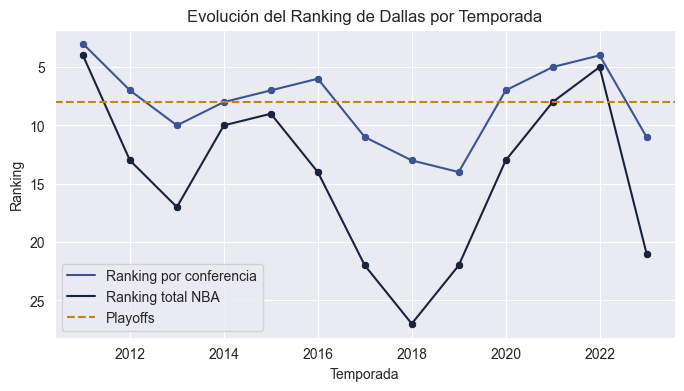

In [65]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="conf_ranking", label="Ranking por conferencia", color=colors[0])
sns.lineplot(data=df_dallas, x="season", y="ranking", label="Ranking total NBA", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="conf_ranking", color=colors[0])
sns.scatterplot(data=df_dallas, x="season", y="ranking", color=colors[2])



plt.gca().invert_yaxis()

plt.axhline(y=8, color=colors[1], linestyle='--', label="Playoffs")

plt.title("Evolución del Ranking de Dallas por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Ranking")


plt.legend()

plt.show()

Observamos que después de ganar el anillo en 2011, el nivel del equipo bajó, sobre todo entre los años 2017 y 2019, años en los que ni siquiera se clasificó para los playoffs. Esto también sucedió la pasada temporada, en 2023.

Para analizar la influencia de las diferentes estadísticas en el rendimiento del equipo, vamos a comparar distintos atributos ofensivos y defensivos con los de los 5 mejores y 5 peores equipos de cada temporada, presentes en los DataFrames ```df_5_prim_media``` y ```df_5_ult_media```.

### Estadísticas ofensivas.

Empezamos comparando nuestros atributos ofensivos, concretamente los porcentajes de tiro:

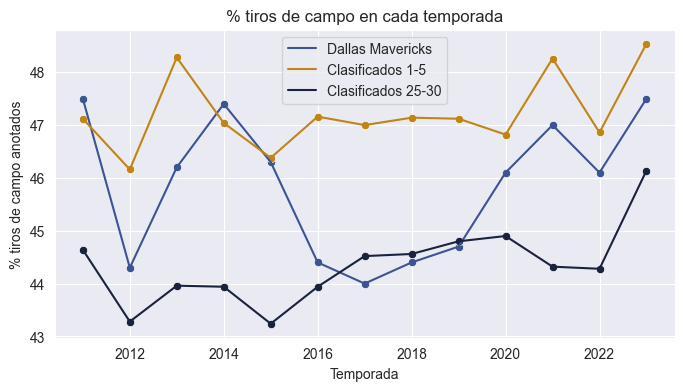

In [66]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="fg_perc", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="fg_perc", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="fg_perc", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="fg_perc", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="fg_perc", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="fg_perc", color=colors[2])


plt.title("% tiros de campo en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("% tiros de campo anotados")


plt.legend()

plt.show()

Se pueden extraer varias observaciones:

1. Los primeros 5 equipos del ranking tienen un % medio en tiros de campo entre 3 y 4 puntos por encima de los peores 5 equipos en cada temporada. De ahí, el coeficiente de correlación entre el % de victorias (que determina el ranking) y el % en tiros de campo, que era de 0.61 aprox.

2. En el caso de Dallas, comparando las gráficas de ranking y % en tiros de campo, vemos una fuerte similitud en los años de peor rendimiento del equipo, entre 2016 y 2019. 

Seguimos graficando porcentajes de tiro:

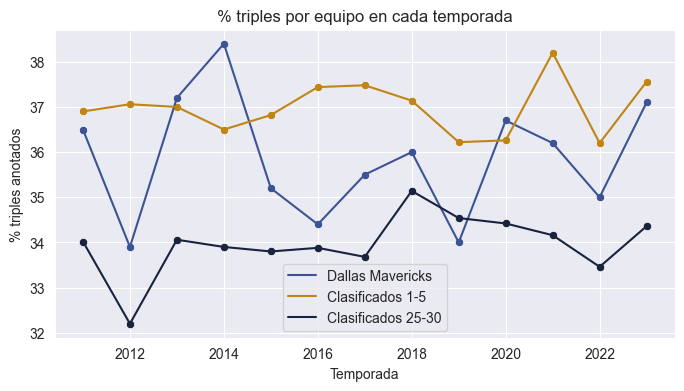

In [67]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="threes_perc", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="threes_perc", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="threes_perc", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="threes_perc", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="threes_perc", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="threes_perc", color=colors[2])



plt.title("% triples por equipo en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("% triples anotados")


plt.legend()

plt.show()

En cuanto al % de triples, podemos observar que el % de nuestro equipo ha estado por encima del de los 5 peores equipos, aunque, normalmente, ha estado algo por debajo de los mejores equipos. Por tanto, podemos decir que este no ha sido el principal problema en nuestros peores años. 

Esto nos lleva a pensar que el % en tiros de 2 en esos años debió ser bastante peor al de la mayoría de equipos. Sin embargo, desde 2020 el % en tiros de campo no parece nuestro mayor problema, estando cerca de los mejores equipos.

Vamos a ver la cantidad de triples realizados y anotados por temporada, para ver su actual influencia en el juego:

In [68]:
# df_team_stats.columns

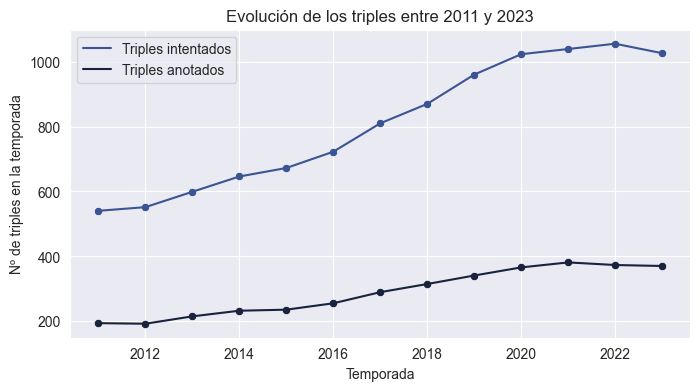

In [69]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_team_stats.groupby("season")[["threes_att", "threes_made"]].sum(), x="season", y="threes_att", label="Triples intentados", color=colors[0])
sns.lineplot(data=df_team_stats.groupby("season")[["threes_att", "threes_made"]].sum(), x="season", y="threes_made", label="Triples anotados", color=colors[2])

sns.scatterplot(data=df_team_stats.groupby("season")[["threes_att", "threes_made"]].sum(), x="season", y="threes_att", color=colors[0])
sns.scatterplot(data=df_team_stats.groupby("season")[["threes_att", "threes_made"]].sum(), x="season", y="threes_made", color=colors[2])

plt.title("Evolución de los triples entre 2011 y 2023")
plt.xlabel("Temporada")
plt.ylabel("Nº de triples en la temporada")


plt.legend()

plt.show()

Vemos que se tiran muchos más triples en la nba actual, así que su importancia es mayor que antes. También vemos que se ha incrementado el % de los triples anotados. Vamos a ver si esto supone una bajada del % de acierto.

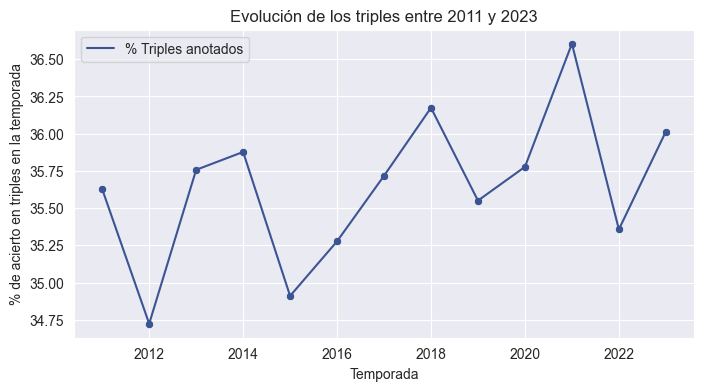

In [70]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_team_stats.groupby("season")[["threes_perc"]].mean(), x="season", y="threes_perc", label="% Triples anotados", color=colors[0])

sns.scatterplot(data=df_team_stats.groupby("season")[["threes_perc"]].mean(), x="season", y="threes_perc", color=colors[0])

plt.title("Evolución de los triples entre 2011 y 2023")
plt.xlabel("Temporada")
plt.ylabel(r"% de acierto en triples en la temporada")


plt.legend()

plt.show()

Comprobamos que no sólo no ha bajado el % de acierto, si no que ha aumentado ligeramente en los últimos años. Esto indica una importancia muy grande de los triples en el juego actual.

Por último, nos queda comparar el acierto de los tiros libres:

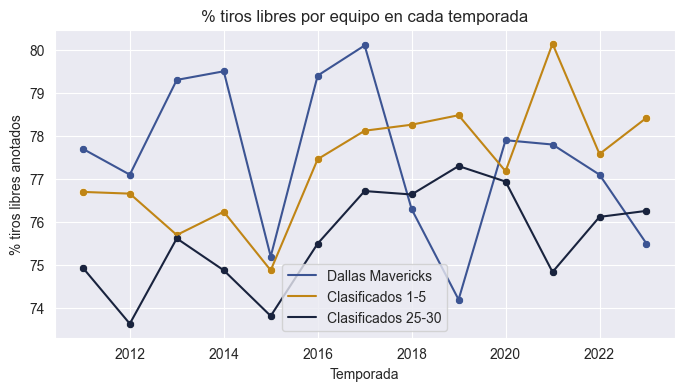

In [71]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="ft_perc", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="ft_perc", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="ft_perc", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="ft_perc", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="ft_perc", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="ft_perc", color=colors[2])



plt.title("% tiros libres por equipo en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("% tiros libres anotados")


plt.legend()

plt.show()

En cuanto a los tiros libres, vemos que, de nuevo, los mejores equipos suelen tener un % más elevado. En cuanto a nuestro equipo, sería un factor a tener en cuenta en las últimas temporadas, ya que ha sufrido un descenso significativo.

Vamos a ver ahora la influencia de otras estadísticas de equipo como: rebotes, asistencias, tapones, etc.

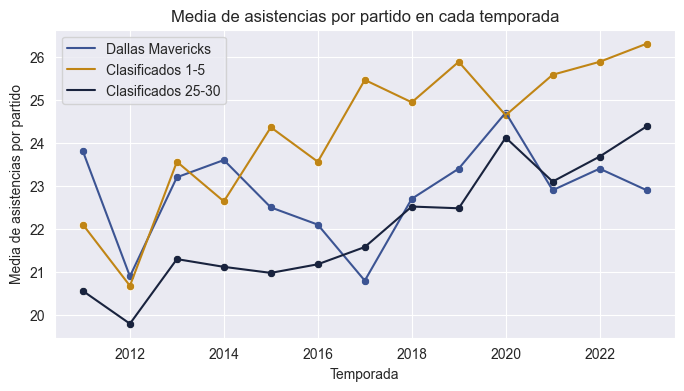

In [72]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="ast", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="ast", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="ast", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="ast", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="ast", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="ast", color=colors[2])



plt.title("Media de asistencias por partido en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("Media de asistencias por partido")


plt.legend()

plt.show()

De nuevo, los mejores equipos tienen un mayor número de asistencias. El equipo ha bajado su nivel asistencias en las últimas temporada, aunque esto no tiene por qué ser negativo, siempre que se encuentren buenas situaciones de tiro.

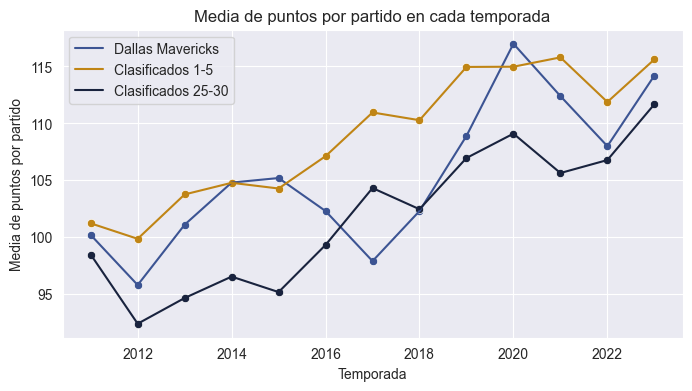

In [73]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="ppg", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="ppg", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="ppg", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="ppg", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="ppg", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="ppg", color=colors[2])



plt.title("Media de puntos por partido en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("Media de puntos por partido")


plt.legend()

plt.show()

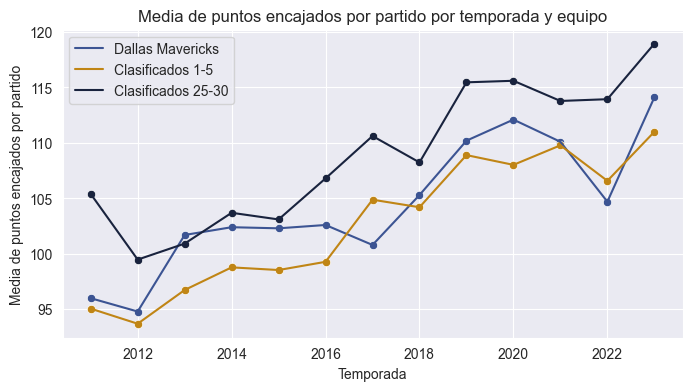

In [74]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="opp_ppg", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="opp_ppg", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="opp_ppg", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="opp_ppg", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="opp_ppg", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="opp_ppg", color=colors[2])



plt.title("Media de puntos encajados por partido por temporada y equipo")
plt.xlabel("Temporada")
plt.ylabel("Media de puntos encajados por partido")


plt.legend()

plt.show()

Observamos que, tanto ofensivamente, como defensivamente, hemos estado cerca de los mejores equipos en puntos anotados y encajados en las últimas temporadas. Sin embargo, no podemos extraer información demasiado útil de esto, ya que el % de victorias depende de la diferencia entre estas dos variables en cada temporada. 

Sí podemos decir que ha aumentado tanto el número de puntos anotados, como el de puntos encajados, respecto al inicio de la década, aunque es la tendencia para toda la liga.

### Estadísticas defensivas:

In [75]:
# df_dallas.columns

In [76]:
team_stats_corr = df_team_stats.loc[:, ['team_win_perc', 'fgm', 'fga', 'fg_perc', 'threes_made',
                                    'threes_att', 'threes_perc', 'ft_made', 'ft_att', 'ft_perc', 'off_reb',
                                    'def_reb', 'ast', 'turnovers', 'steals', 'blocks', 'pers_fouls', 'ppg', 'opp_ppg',
                                    'plus_minus']].corr().loc[:, "opp_ppg"]
team_stats_corr

team_win_perc   -0.312907
fgm              0.726806
fga              0.817983
fg_perc          0.232983
threes_made      0.703804
threes_att       0.743115
threes_perc     -0.000621
ft_made          0.148707
ft_att           0.070497
ft_perc          0.196326
off_reb         -0.166458
def_reb          0.436580
ast              0.524234
turnovers        0.042391
steals          -0.064578
blocks          -0.139102
pers_fouls       0.150306
ppg              0.783119
opp_ppg          1.000000
plus_minus      -0.317762
Name: opp_ppg, dtype: float64

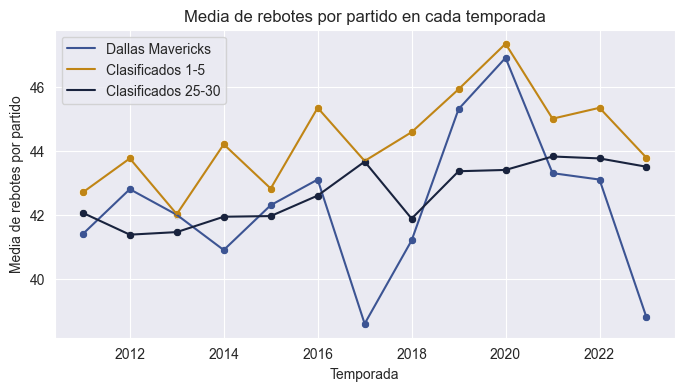

In [77]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="tot_reb", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="tot_reb", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="tot_reb", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="tot_reb", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="tot_reb", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="tot_reb", color=colors[2])



plt.title("Media de rebotes por partido en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("Media de rebotes por partido")


plt.legend()

plt.show()

En cuanto a rebotes, los primeros clasificados tienen más rebotes en todas las temporadas que los últimos, por lo que podría ser un factor importante en el % de victorias. 

En relación a nuestro equipo, este parece uno de los mayores problemas en los últimos años, y es un aspecto del juego importante a mejorar.

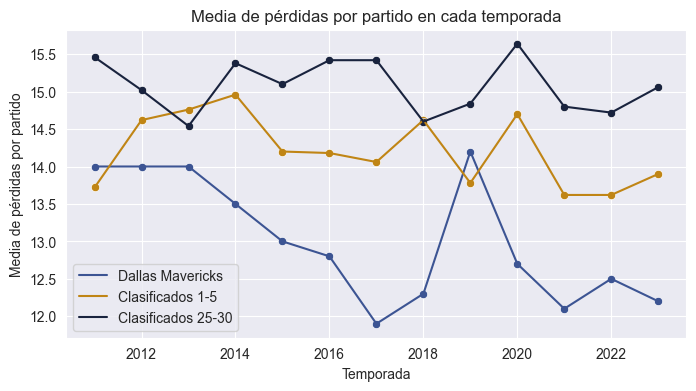

In [78]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="turnovers", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="turnovers", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="turnovers", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="turnovers", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="turnovers", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="turnovers", color=colors[2])


plt.title("Media de pérdidas por partido en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("Media de pérdidas por partido")


plt.legend()

plt.show()

En cuanto a las pérdidas, se observa que nuestro equipo tiene muy buenos registros, perdiendo muchos menos balones que los mejores equipos de la liga. Por tanto, este no es un factor a mejorar.

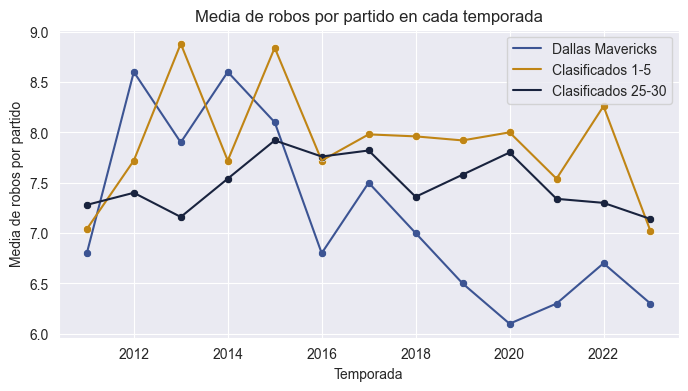

In [79]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="steals", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="steals", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="steals", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="steals", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="steals", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="steals", color=colors[2])



plt.title("Media de robos por partido en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("Media de robos por partido")


plt.legend()

plt.show()

Sin embargo, el número de robos está muy por debajo incluso de la media de los peores 5 equipos en las últimas temporadas. Este podría ser un atributo importante a tener en cuenta para mejorar nuestro rating defensivo.

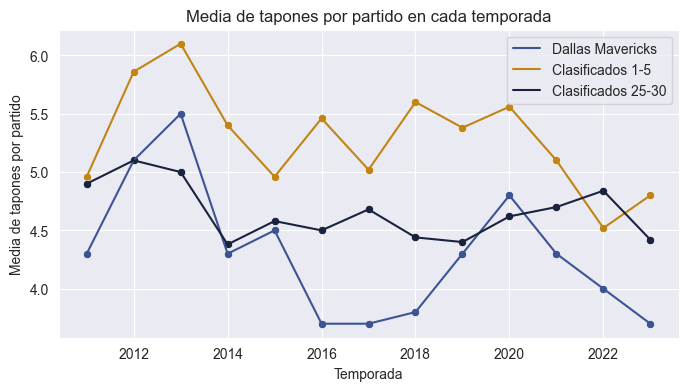

In [80]:
plt.figure(figsize=(8, 4))

sns.lineplot(data=df_dallas, x="season", y="blocks", label="Dallas Mavericks", color=colors[0])
sns.lineplot(data=df_5_prim_media, x="season", y="blocks", label="Clasificados 1-5", color=colors[1])
sns.lineplot(data=df_5_ult_media, x="season", y="blocks", label="Clasificados 25-30", color=colors[2])


sns.scatterplot(data=df_dallas, x="season", y="blocks", color=colors[0])
sns.scatterplot(data=df_5_prim_media, x="season", y="blocks", color=colors[1])
sns.scatterplot(data=df_5_ult_media, x="season", y="blocks", color=colors[2])



plt.title("Media de tapones por partido en cada temporada")
plt.xlabel("Temporada")
plt.ylabel("Media de tapones por partido")


plt.legend()

plt.show()

Al igual que los robos, también convendría mejorar el número de tapones por partido para reducir el número de puntos encajados.

Analizando las gráficas, podemos seleccionar ciertas estadísticas como las más influyentes en la diferencia entre el 1er clasificado y nuestro equipo.

En ataque:

 1. % tiros de dos. Sobre todo en la última temporada, ha sido un aspecto ofensivo a mejorar, ya que el % de triples se encuentra en un buen nivel.

 2. Asistencias. Podemos intentar encontrar mejores situaciones de tiro mediante un juego más colectivo, ya que hemos visto que nuestro número de asistencias es muy bajo y no hemos obtenido muy buenos resultados. Aunque esto depende de los jugadores que tengamos.


En defensa:

 1. Rebotes.

 2. Robos.

 3. Tapones.


En defensa se encuentran los peores registros del equipo, por lo que podríamos buscar mejorar estos aspectos para lograr un menor número de puntos encajados y, así, un mayor número de victorias.

## 2. Comparación de las estadísticas del equipo del año pasado y de este.

Esta sección empieza cargando en un DataFrame las estadísticas de la plantilla de Dallas Mavericks en la temporada 2022 - 2023. A partir de ahí, compararemos las estadísticas de nuestros jugadores con las de los mejores y las de los peores 5 equipos de la temporada 2022 - 2023.

Recordemos que en dicha temporada no nos clasificamos para playoffs.

In [81]:
df_jugs_2023 = pd.read_csv("./data/player_stats_2023.csv", index_col=0).drop(columns="Unnamed: 0")
df_jugs_2023.head()

,season,player_name,pos,player_age,height,draft_pick,games_played,wins,losses,mins_played,...,ft_made,ft_att,ft_perc,reb,ast,turnovers,steals,blocks,pers_fouls,plus_minus
0,2023,Luka Doncic,PG,24,6' 7'',2018 R1 P3,66,33,33,36.2,...,7.8,10.5,74.2,8.6,8.0,3.6,1.4,0.5,2.5,1.9
1,2023,Kyrie Irving,PG,31,6' 2'',2011 R1 P1,20,8,12,38.1,...,4.5,4.7,94.7,5.0,6.0,1.9,1.3,0.6,2.8,4.8
2,2023,Spencer Dinwiddie,SG,30,6' 5'',2014 R2 P8,53,28,25,34.1,...,3.2,3.9,82.1,3.1,5.3,1.7,0.7,0.3,2.3,-1.4
3,2023,Christian Wood,PF,27,6' 8'',2015 Undrafted,67,33,34,25.9,...,3.2,4.2,77.2,7.3,1.8,1.8,0.4,1.1,2.5,-0.7
4,2023,Tim Hardaway Jr.,SG,31,6' 5'',2013 R1 P24,71,37,34,30.3,...,1.8,2.3,77.0,3.5,1.8,0.8,0.7,0.2,1.7,2.3


In [104]:
df_jugs_2023.describe()

,season,player_age,games_played,wins,losses,mins_played,ppg,fgm,fga,fg_perc,...,ft_made,ft_att,ft_perc,reb,ast,turnovers,steals,blocks,pers_fouls,plus_minus
count,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2023.0,28.521739,38.173913,17.869565,20.304348,18.504348,8.717391,3.104348,6.534783,49.373913,...,1.343478,1.743478,62.013043,2.791304,1.804348,0.904348,0.491304,0.282609,1.673913,-0.217391
std,0.0,4.262624,24.658858,12.516550,12.356209,11.208904,7.998787,2.729049,5.536130,16.436385,...,1.842633,2.343623,28.237263,2.115293,1.979779,0.771350,0.395328,0.293338,0.779404,2.079041
min,2023.0,20.000000,1.000000,1.000000,0.000000,2.800000,1.300000,0.400000,1.000000,23.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.100000
25%,2023.0,25.000000,16.000000,5.500000,11.000000,8.550000,4.050000,1.500000,3.050000,41.250000,...,0.300000,0.350000,60.500000,1.450000,0.850000,0.450000,0.200000,0.050000,1.200000,-1.350000
50%,2023.0,30.000000,40.000000,19.000000,21.000000,16.000000,5.900000,2.100000,4.400000,45.500000,...,0.600000,1.000000,71.100000,1.900000,1.400000,0.700000,0.400000,0.200000,1.700000,-0.700000
75%,2023.0,31.500000,56.500000,27.500000,30.500000,28.100000,9.100000,3.300000,7.350000,51.250000,...,1.650000,2.250000,79.100000,3.600000,1.800000,1.000000,0.700000,0.500000,2.300000,1.150000
max,2023.0,35.000000,78.000000,37.000000,41.000000,38.100000,32.400000,10.900000,22.000000,100.000000,...,7.800000,10.500000,94.700000,8.600000,8.000000,3.600000,1.400000,1.100000,2.800000,4.800000


Vamos a ver la posición del equipo en estas estadísticas en la liga:


In [82]:
df_team_stats.head()

,season,ranking,team_name,games_played,wins,losses,team_win_perc,fgm,fga,fg_perc,...,off_reb,def_reb,ast,turnovers,steals,blocks,pers_fouls,ppg,opp_ppg,plus_minus
0,2023,1,Milwaukee Bucks,82,58,24,0.707,42.7,90.4,47.3,...,11.1,37.5,25.8,14.6,6.4,4.9,18.0,116.9,113.3,3.6
1,2023,2,Boston Celtics,82,57,25,0.695,42.2,88.8,47.5,...,9.7,35.6,26.7,13.4,6.4,5.2,18.8,117.9,111.4,6.5
2,2023,3,Philadelphia 76ers,82,54,28,0.659,40.8,83.8,48.7,...,8.7,32.2,25.2,13.7,7.7,4.7,20.4,115.2,110.9,4.3
3,2023,4,Denver Nuggets,82,53,29,0.646,43.6,86.4,50.4,...,10.1,32.9,28.9,14.5,7.5,4.5,18.6,115.8,112.5,3.3
4,2023,5,Cleveland Cavaliers,82,51,31,0.622,41.6,85.2,48.8,...,9.7,31.4,24.9,13.3,7.1,4.7,19.0,112.3,106.9,5.4


In [83]:
variables = ['team_win_perc', 'fg_perc', 'threes_perc','ft_perc', 'off_reb',
             'def_reb', 'ast', 'turnovers', 'steals', 'blocks', 'pers_fouls', 'ppg', 'opp_ppg']
rank_stats = []

df_ranks = df_team_stats.sort_values("fg_perc", ascending=False).loc[(df_team_stats.loc[:, "season"] == 2023), :].reset_index(drop=True)

for variable in variables:

    df_ranks = df_ranks.sort_values(variable, ascending=False).loc[(df_ranks.loc[:, "season"] == 2023), :].reset_index(drop=True)
    
    for idx, row in df_ranks.iterrows():
        if row["team_name"] == "Dallas Mavericks":
            rank_stats.append(idx+1)
            # print(df_ranks)
            break

# print(len(rank_stats))
rank_stats

[21, 16, 8, 23, 30, 27, 28, 29, 29, 28, 8, 16, 15]

In [84]:
lista_stats = [r"% victorias", r"% tiros de campo", r"% triples", r"% tiros libres", r"Reb of.", r"Reb def.", r"Asistencias", r"Pérdidas", r"Robos", "Tapones", "Faltas", "PPG", "PPG encajados"]

df_dallas_stats_rank = pd.DataFrame(columns=lista_stats)
df_dallas_stats_rank.loc[len(df_dallas_stats_rank)] = rank_stats
df_dallas_stats_rank[r"Pérdidas"] = 30 - df_dallas_stats_rank[r"Pérdidas"]
df_dallas_stats_rank[r"Faltas"] = 30 - df_dallas_stats_rank[r"Faltas"]
df_dallas_stats_rank[r"PPG encajados"] = 30 - df_dallas_stats_rank[r"PPG encajados"]

df_dallas_stats_rank = df_dallas_stats_rank.T.rename(columns={0:"rank"}).sort_values("rank", ascending=True)
df_dallas_stats_rank

,rank
Pérdidas,1
% triples,8
PPG encajados,15
% tiros de campo,16
PPG,16
% victorias,21
Faltas,22
% tiros libres,23
Reb def.,27
Asistencias,28


Visualizamos la posición del equipo en el ranking de cada estadística en la temporada 2022-2023

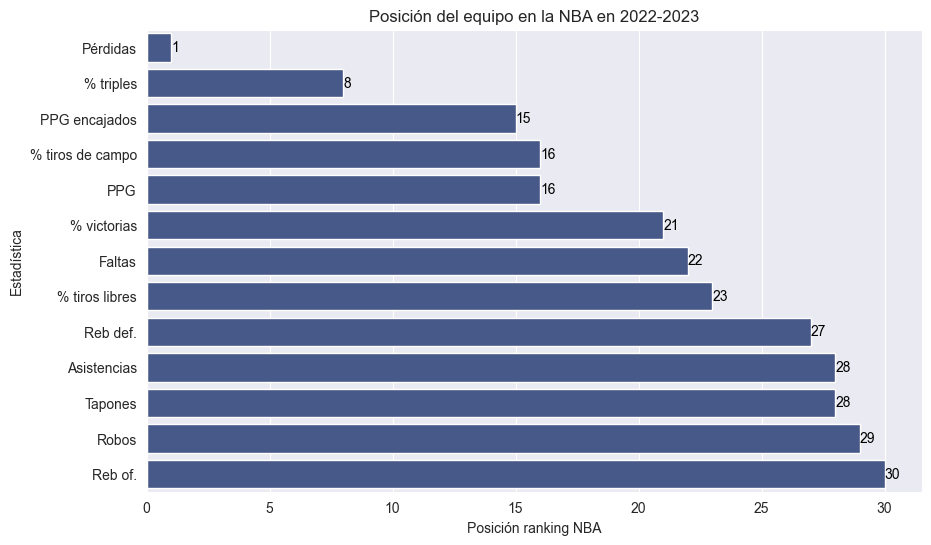

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='rank', y=df_dallas_stats_rank.index, data=df_dallas_stats_rank, orient='h', color=colors[0])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', fontsize=10, color='black')

plt.xlabel('Posición ranking NBA')
plt.ylabel('Estadística')
plt.title('Posición del equipo en la NBA en 2022-2023', loc="center")

plt.show()


La gráfica confirma las hipótesis planteadas en el apartado anterior.

Vemos que nuestro equipo no ha estado entre los peores a nivel de tiro, de hecho, en acierto en triples fuimos los 8os en la NBA. Sin embargo, hay estadísticas como rebotes, asistencias, robos y tapones en los que estuvimos entre los peores 5 equipos de la temporada y que son los que podríamos buscar mejorar.

Vamos a realizar una gráfica para ver cuantitativamente nuestras mejores y peores estadísticas y poder evaluar a nuestros jugadores:

In [86]:
import plotly as py
import plotly.graph_objects as go

In [87]:
categories = ["Tiros de campo", "Triples", "Tiros libres"]

values1 = df_dallas.loc[df_dallas.loc[:, "season"] == 2023, ["fg_perc", "threes_perc", "ft_perc"]].values[0]
values2 = df_5_prim_media.loc[df_5_prim_media.loc[:, "season"] == 2023, ["fg_perc", "threes_perc", "ft_perc"]].values[0]
values3 = df_5_ult_media.loc[df_5_ult_media.loc[:, "season"] == 2023, ["fg_perc", "threes_perc", "ft_perc"]].values[0]

team_names = ["Dallas Mavericks (21)", "Media 5 primeros", "Media 5 últimos"]
x_title = 'Estadística'
y_title = 'Porcentaje de acierto'


fig = go.Figure(data=[
    go.Bar(
        name=team_names[0], x=categories, y=values1,
        text=[f"{val:.2f}" for val in values1], textposition='outside',
        marker_color=colors[0] 
    ),
    go.Bar(
        name=team_names[1], x=categories, y=values2,
        text=[f"{val:.2f}" for val in values2], textposition='outside',
        marker_color=colors[1] 
    ),
    go.Bar(
        name=team_names[2], x=categories, y=values3,
        text=[f"{val:.2f}" for val in values3], textposition='outside',
        marker_color=colors[2] 
    )
])

fig.update_layout(
    title='Porcentaje de acierto en distintos tiros en la temporada 2022-2023',
    xaxis_title=x_title,
    yaxis_title=y_title,
    barmode='group',
    legend=dict(title='Equipos (Pos)'),
    yaxis=dict(range=[0, 100]),
    template="seaborn"
)


fig.show()


In [88]:

categories = ["Rebotes", "Asistencias", "Robos", "Tapones"]

values1 = df_dallas.loc[df_dallas.loc[:, "season"] == 2023, ["tot_reb", "ast", "steals", "blocks"]].values[0]
values2 = df_5_prim_media.loc[df_5_prim_media.loc[:, "season"] == 2023, ["tot_reb", "ast", "steals", "blocks"]].values[0]
values3 = df_5_ult_media.loc[df_5_ult_media.loc[:, "season"] == 2023, ["tot_reb", "ast", "steals", "blocks"]].values[0]


team_names = ["Dallas Mavericks (21)", "Media 5 primeros", "Media 5 últimos"]
x_title = 'Estadística'
y_title = 'Media por partido'


fig = go.Figure(data=[
    go.Bar(
        name=team_names[0], x=categories, y=values1,
        text=[f"{val:.2f}" for val in values1], textposition='outside',
        marker_color=colors[0] 
    ),
    go.Bar(
        name=team_names[1], x=categories, y=values2,
        text=[f"{val:.2f}" for val in values2], textposition='outside',
        marker_color=colors[1] 
    ),
    go.Bar(
        name=team_names[2], x=categories, y=values3,
        text=[f"{val:.2f}" for val in values3], textposition='outside',
        marker_color=colors[2] 
    )
])


fig.update_layout(
    title='Comparación de estadísticas en la temporada 2022-2023',
    xaxis_title=x_title,
    yaxis_title=y_title,
    barmode='group',
    legend=dict(title='Equipos (Pos)'),
    yaxis=dict(range=[0, 50]),
    template="seaborn"
)


fig.show()

Viendo estos resultados, parece que nuestro mayor punto débil se encuentra en los rebotes, así que buscaremos realizar modificaciones en el equipo para mejorarlo.

Vamos a ver los jugadores que teníamos en la temporada 2022 - 2023 y las modificaciones hechas para la 2023 - 2024.

In [89]:
df_jugs_2023 = pd.read_csv("./data/player_stats_2023.csv", index_col=0).drop(columns="Unnamed: 0")
df_jugs_2023.head()

,season,player_name,pos,player_age,height,draft_pick,games_played,wins,losses,mins_played,...,ft_made,ft_att,ft_perc,reb,ast,turnovers,steals,blocks,pers_fouls,plus_minus
0,2023,Luka Doncic,PG,24,6' 7'',2018 R1 P3,66,33,33,36.2,...,7.8,10.5,74.2,8.6,8.0,3.6,1.4,0.5,2.5,1.9
1,2023,Kyrie Irving,PG,31,6' 2'',2011 R1 P1,20,8,12,38.1,...,4.5,4.7,94.7,5.0,6.0,1.9,1.3,0.6,2.8,4.8
2,2023,Spencer Dinwiddie,SG,30,6' 5'',2014 R2 P8,53,28,25,34.1,...,3.2,3.9,82.1,3.1,5.3,1.7,0.7,0.3,2.3,-1.4
3,2023,Christian Wood,PF,27,6' 8'',2015 Undrafted,67,33,34,25.9,...,3.2,4.2,77.2,7.3,1.8,1.8,0.4,1.1,2.5,-0.7
4,2023,Tim Hardaway Jr.,SG,31,6' 5'',2013 R1 P24,71,37,34,30.3,...,1.8,2.3,77.0,3.5,1.8,0.8,0.7,0.2,1.7,2.3


Para las estadísticas del equipo de 2023 - 2024, se han cogido las estadísticas de la nueva temporada, aunque tan solo se han jugado 2 partidos por el momento.

In [90]:
df_jugs_2024 = pd.read_csv("./data/player_stats_2024.csv", index_col=0)
df_jugs_2024.head()

,season,player_name,pos,player_age,height,draft_pick,games_played,wins,losses,mins_played,...,ft_made,ft_att,ft_perc,reb,ast,turnovers,steals,blocks,pers_fouls,plus_minus
0,2024,Luka Doncic,PG,24,6' 7'',2018 R1 P3,2,2,0,35.1,...,6.0,8.5,70.6,11.5,8.5,2.0,1.0,0.0,1.0,6.5
1,2024,Kyrie Irving,PG,31,6' 2'',2011 R1 P1,2,2,0,35.1,...,2.5,2.5,100.0,4.5,6.0,1.0,0.5,0.0,2.5,-3.0
2,2024,Tim Hardaway Jr.,SF,31,6' 5'',2013 R1 P24,2,2,0,29.1,...,4.0,4.0,100.0,5.0,2.5,1.0,0.5,0.0,1.0,11.0
3,2024,Dereck Lively II,C,19,7' 1'',2023 R1 P12,2,2,0,23.8,...,1.5,2.5,60.0,6.0,0.5,1.0,0.5,1.0,2.0,10.5
4,2024,Dwight Powell,PF,32,6' 10'',2014 R2 P15,1,1,0,12.9,...,2.0,2.0,100.0,2.0,0.0,0.0,1.0,0.0,0.0,-6.0


Vamos a comparar las estadísticas del equipo antiguo y nuevo, para hacernos nua idea de si hemos mejorado los puntos débiles del equipo. Como dependen del número de minutos de juego de los jugadores, haremos nuevos DataFrames, que contengan las estadísticas por minuto.

In [91]:
# df_jugs_2023.columns

In [92]:
df_jugs_2023_por_min = df_jugs_2023.copy()

df_jugs_2023_por_min["ppm"] = df_jugs_2023_por_min["ppg"] / df_jugs_2023_por_min["mins_played"]
df_jugs_2023_por_min["reb_per_min"] = df_jugs_2023_por_min["reb"] / df_jugs_2023_por_min["mins_played"]
df_jugs_2023_por_min["ast_per_min"] = df_jugs_2023_por_min["ast"] / df_jugs_2023_por_min["mins_played"]
df_jugs_2023_por_min["turnovers_per_min"] = df_jugs_2023_por_min["turnovers"] / df_jugs_2023_por_min["mins_played"]
df_jugs_2023_por_min["steals_per_min"] = df_jugs_2023_por_min["steals"] / df_jugs_2023_por_min["mins_played"]
df_jugs_2023_por_min["blocks_per_min"] = df_jugs_2023_por_min["blocks"] / df_jugs_2023_por_min["mins_played"]

# print(df_jugs_2023_por_min.columns)
df_jugs_2023_por_min.head()


,season,player_name,pos,player_age,height,draft_pick,games_played,wins,losses,mins_played,...,steals,blocks,pers_fouls,plus_minus,ppm,reb_per_min,ast_per_min,turnovers_per_min,steals_per_min,blocks_per_min
0,2023,Luka Doncic,PG,24,6' 7'',2018 R1 P3,66,33,33,36.2,...,1.4,0.5,2.5,1.9,0.895028,0.237569,0.220994,0.099448,0.038674,0.013812
1,2023,Kyrie Irving,PG,31,6' 2'',2011 R1 P1,20,8,12,38.1,...,1.3,0.6,2.8,4.8,0.708661,0.131234,0.157480,0.049869,0.034121,0.015748
2,2023,Spencer Dinwiddie,SG,30,6' 5'',2014 R2 P8,53,28,25,34.1,...,0.7,0.3,2.3,-1.4,0.519062,0.090909,0.155425,0.049853,0.020528,0.008798
3,2023,Christian Wood,PF,27,6' 8'',2015 Undrafted,67,33,34,25.9,...,0.4,1.1,2.5,-0.7,0.640927,0.281853,0.069498,0.069498,0.015444,0.042471
4,2023,Tim Hardaway Jr.,SG,31,6' 5'',2013 R1 P24,71,37,34,30.3,...,0.7,0.2,1.7,2.3,0.475248,0.115512,0.059406,0.026403,0.023102,0.006601


In [93]:
df_jugs_2024_por_min = df_jugs_2024.copy()

df_jugs_2024_por_min["ppm"] = df_jugs_2024_por_min["ppg"] / df_jugs_2024_por_min["mins_played"]
df_jugs_2024_por_min["reb_per_min"] = df_jugs_2024_por_min["reb"] / df_jugs_2024_por_min["mins_played"]
df_jugs_2024_por_min["ast_per_min"] = df_jugs_2024_por_min["ast"] / df_jugs_2024_por_min["mins_played"]
df_jugs_2024_por_min["turnovers_per_min"] = df_jugs_2024_por_min["turnovers"] / df_jugs_2024_por_min["mins_played"]
df_jugs_2024_por_min["steals_per_min"] = df_jugs_2024_por_min["steals"] / df_jugs_2024_por_min["mins_played"]
df_jugs_2024_por_min["blocks_per_min"] = df_jugs_2024_por_min["blocks"] / df_jugs_2024_por_min["mins_played"]

# print(df_jugs_2024_por_min.columns)
df_jugs_2024_por_min.head()

,season,player_name,pos,player_age,height,draft_pick,games_played,wins,losses,mins_played,...,steals,blocks,pers_fouls,plus_minus,ppm,reb_per_min,ast_per_min,turnovers_per_min,steals_per_min,blocks_per_min
0,2024,Luka Doncic,PG,24,6' 7'',2018 R1 P3,2,2,0,35.1,...,1.0,0.0,1.0,6.5,1.168091,0.327635,0.242165,0.056980,0.028490,0.000000
1,2024,Kyrie Irving,PG,31,6' 2'',2011 R1 P1,2,2,0,35.1,...,0.5,0.0,2.5,-3.0,0.555556,0.128205,0.170940,0.028490,0.014245,0.000000
2,2024,Tim Hardaway Jr.,SF,31,6' 5'',2013 R1 P24,2,2,0,29.1,...,0.5,0.0,1.0,11.0,0.618557,0.171821,0.085911,0.034364,0.017182,0.000000
3,2024,Dereck Lively II,C,19,7' 1'',2023 R1 P12,2,2,0,23.8,...,0.5,1.0,2.0,10.5,0.525210,0.252101,0.021008,0.042017,0.021008,0.042017
4,2024,Dwight Powell,PF,32,6' 10'',2014 R2 P15,1,1,0,12.9,...,1.0,0.0,0.0,-6.0,0.852713,0.155039,0.000000,0.000000,0.077519,0.000000


Hacemos la media de las estadísticas y las guardamos en un DataFrame comparando ambas temporadas:

In [94]:
variables = ["player_name", "player_age", "ppm", "fg_perc", "threes_perc", "ft_perc", "reb_per_min", "ast_per_min", "turnovers_per_min", "steals_per_min", "blocks_per_min"]

df_comp_2023 = pd.DataFrame(columns=variables)

for idx, row in df_jugs_2023_por_min.iterrows():
    cada_player = []
    for variable in variables:
        cada_player.append(row[variable])

    df_comp_2023.loc[len(df_comp_2023)] = cada_player

df_comp_2023.head()


,player_name,player_age,ppm,fg_perc,threes_perc,ft_perc,reb_per_min,ast_per_min,turnovers_per_min,steals_per_min,blocks_per_min
0,Luka Doncic,24,0.895028,49.6,34.2,74.2,0.237569,0.220994,0.099448,0.038674,0.013812
1,Kyrie Irving,31,0.708661,51.0,39.2,94.7,0.131234,0.157480,0.049869,0.034121,0.015748
2,Spencer Dinwiddie,30,0.519062,45.5,40.5,82.1,0.090909,0.155425,0.049853,0.020528,0.008798
3,Christian Wood,27,0.640927,51.5,37.6,77.2,0.281853,0.069498,0.069498,0.015444,0.042471
4,Tim Hardaway Jr.,31,0.475248,40.1,38.5,77.0,0.115512,0.059406,0.026403,0.023102,0.006601


Hacemos lo mismo para 2024:

In [95]:
variables = ["player_name", "player_age", "ppm", "fg_perc", "threes_perc", "ft_perc", "reb_per_min", "ast_per_min", "turnovers_per_min", "steals_per_min", "blocks_per_min"]

df_comp_2024 = pd.DataFrame(columns=variables)

for idx, row in df_jugs_2024_por_min.iterrows():
    cada_player = []
    for variable in variables:
        cada_player.append(row[variable])

    df_comp_2024.loc[len(df_comp_2024)] = cada_player

df_comp_2024

,player_name,player_age,ppm,fg_perc,threes_perc,ft_perc,reb_per_min,ast_per_min,turnovers_per_min,steals_per_min,blocks_per_min
0,Luka Doncic,24,1.168091,58.0,48.0,70.6,0.327635,0.242165,0.056980,0.028490,0.000000
1,Kyrie Irving,31,0.555556,39.0,16.7,100.0,0.128205,0.170940,0.028490,0.014245,0.000000
2,Tim Hardaway Jr.,31,0.618557,35.5,35.3,100.0,0.171821,0.085911,0.034364,0.017182,0.000000
3,Dereck Lively II,19,0.525210,91.7,0.0,60.0,0.252101,0.021008,0.042017,0.021008,0.042017
4,Dwight Powell,32,0.852713,100.0,100.0,100.0,0.155039,0.000000,0.000000,0.077519,0.000000
5,Grant Williams,24,0.341615,47.1,41.7,100.0,0.186335,0.000000,0.077640,0.000000,0.015528
6,Josh Green,22,0.311419,41.7,40.0,60.0,0.086505,0.051903,0.051903,0.069204,0.000000
7,Maxi Kleber,31,0.122449,20.0,40.0,0.0,0.244898,0.081633,0.000000,0.000000,0.020408
8,Dante Exum,28,0.431034,50.0,0.0,100.0,0.086207,0.000000,0.000000,0.086207,0.086207
9,Derrick Jones Jr.,26,0.193798,25.0,0.0,50.0,0.077519,0.038760,0.077519,0.000000,0.000000


Vemos que, de momento, tan sólo 6 de los 11 jugadores que han participado en este inicio de temporada se encontraban el año pasado en el equipo.

Y hacemos un df con la media de cada stat por temporada:

In [96]:
variables = ["player_age", "ppm", "fg_perc", "threes_perc", "ft_perc", "reb_per_min", "ast_per_min", "turnovers_per_min", "steals_per_min", "blocks_per_min"]
season = ["2023", "2024"]

df_comp_23_24 = pd.DataFrame(columns=variables)

fila_2023 = df_comp_2023.iloc[:, 1:].mean()
fila_2024 = df_comp_2024.iloc[:, 1:].mean()

df_comp_23_24.loc[len(df_comp_23_24)] = fila_2023
df_comp_23_24.loc[len(df_comp_23_24)] = fila_2024

df_comp_23_24.index = season
df_comp_23_24



,player_age,ppm,fg_perc,threes_perc,ft_perc,reb_per_min,ast_per_min,turnovers_per_min,steals_per_min,blocks_per_min
2023,28.521739,0.471056,49.373913,32.965217,62.013043,0.149656,0.085720,0.058012,0.025865,0.014102
2024,27.363636,0.479925,55.272727,29.245455,67.327273,0.156024,0.070153,0.040753,0.028532,0.014924


Si ahora multiplicamos las variables por minuto y jugador x48 mins que tiene el partido, y x5 jugadores, tenemos una media de los puntos, rebotes, etc. por partido (aproximación), para una mejor comparación:

In [97]:
# df_comp_23_24.columns

In [98]:
df_comp_23_24["ppg"] = df_comp_23_24["ppm"] * 48 * 5
df_comp_23_24["reb"] = df_comp_23_24["reb_per_min"] * 48 * 5
df_comp_23_24["ast"] = df_comp_23_24["ast_per_min"] * 48 * 5
df_comp_23_24["turnovers"] = df_comp_23_24["turnovers_per_min"] * 48 * 5
df_comp_23_24["steals"] = df_comp_23_24["steals_per_min"] * 48 * 5
df_comp_23_24["blocks"] = df_comp_23_24["blocks_per_min"] * 48 * 5

df_comp_23_24


,player_age,ppm,fg_perc,threes_perc,ft_perc,reb_per_min,ast_per_min,turnovers_per_min,steals_per_min,blocks_per_min,ppg,reb,ast,turnovers,steals,blocks
2023,28.521739,0.471056,49.373913,32.965217,62.013043,0.149656,0.085720,0.058012,0.025865,0.014102,113.053386,35.917325,20.572901,13.922942,6.207625,3.384516
2024,27.363636,0.479925,55.272727,29.245455,67.327273,0.156024,0.070153,0.040753,0.028532,0.014924,115.181942,37.445808,16.836764,9.780621,6.847767,3.581669


In [99]:
# df_comp_23_24.columns

Mostramos en una gráfica la comparación:

In [100]:
categories = ["Edad media", "PPG", "Rebotes", "Asistencias", "Pérdidas", "Robos", "Tapones"]

values1 = df_comp_23_24.loc["2023", ["player_age", 'ppg', 'reb', 'ast', 'turnovers', 'steals', 'blocks']]
values2 = df_comp_23_24.loc["2024", ["player_age", 'ppg', 'reb', 'ast', 'turnovers', 'steals', 'blocks']]


seasons = ["2023", "2024"]
x_title = 'Estadística'
y_title = 'Media por partido'


fig = go.Figure(data=[
    go.Bar(name=seasons[0], x=categories, y=values1, text=[f"{val:.2f}" for val in values1], textposition='outside', marker_color=colors[0] ),
    go.Bar(name=seasons[1], x=categories, y=values2, text=[f"{val:.2f}" for val in values2], textposition='outside', marker_color=colors[1] )
])



fig.update_layout(
    title='Comparación de estadísticas medias en la temporada',
    xaxis_title=x_title,
    yaxis_title=y_title,
    barmode='group',
    legend=dict(title='Temporada'),
    yaxis=dict(range=[0, 125]),
    template="seaborn"
)

fig.show()

Viendo estos resultados, parece que esta temporada se han logrado mejorar aspectos como:

* Puntos por partido. Han aumentado de 113,05 a 115,18.

* Rebotes. Era nuestro peor registro y hemos conseguido aumentarlo.

* Pérdidas. Ya teníamos un buen registro de pérdidas en la temporada 2023, donde fuimos el 2º mejor equipo. Aún así, en este inicio de temporada se han reducido.

* Robos. Han pasado de 6,21 a 6,85. Esto es un indicativo de una mejor defensa.

* Tapones. Al igual que los robos, se han aumentado ligramente.


Parece que, tras el inicio de temporada, hemos logrado mejorar registros negativos de la temporada pasada, aunque todavía es demasiado pronto para evaluar la situación. Esto se debe a los cambios realizados en la plantilla y a las directrices de mejora llevadas a cado por el staff técnico.

## 3. Conclusiones y recomendaciones.

Tras el análisis realizado, podemos extraer varias conclusiones en diversos ámbitos:

1. Trayectoria del equipo.

    * El equipo sufrió un descenso de nivel después de ganar el anillo en 2011, teniendo sus peores registros entre los años 2017 y 2019.

    * A partir de 2018, con el pick de Luka Doncic, el equipo comenzó a mejorar su rendimiento y encontró cierta estabilidad, estando en las últimas temporadas clasificado para playoffs, excepto en 2023, temporada en la que se realizaron muchos trades de jugadores, llegando a haber jugado 23 jugadores distintos.

    * En los últimos años, las peores estadísticas del equipo han sido el % en tiros de dos, asistencias, rebotes, robos y tapones.

2. Cambios de 2023 a 2024.

    * Tan solo 6 de los 11 jugadores que han participado en este inicio de temporada se encontraban el año pasado en el equipo y varios de ellos llegaron con la temporada en marcha.

    * En estos primeros partidos, se han logrado mejorar levemente los aspectos negativos anotados, gracias a los cambios en la plantilla y la detección y trabajo de estos.

3. Recomendaciones de mejora.

    * Aunque parece que estamos en un buen camino, creo que se podrían seguir mejorando aspectos, sobre todo defensivos, mediante la incorporación de un jugador interior, que aporte un buen número de rebotes y tapones y aporte solidez defensiva al equipo. Mirando los jugadores que acaban contrato en 2024, muestro algunas opciones interesantes a continuación:

    

In [101]:
df_recomend = pd.read_csv(r"./data/recomendaciones_pivots.csv", sep=";")
df_recomend

,player,pos,age,height,exp_years,salary_2024,mins_2023,ppg_2023,tot_reb_2023,ast_2023,steals_2023,blocks_2023
0,Nicolas Claxton,C,25,6' 11'',5,8625000,29.9,12.6,9.2,1.9,1.3,2.5
1,Jonas Valanciunas,C,31,6' 11'',12,15067500,24.9,14.1,10.2,1.8,0.3,0.7
2,Xavier Tillman,C,25,6' 7'',4,1632821,19.3,7.0,5.0,1.6,1.0,0.5
3,Isaiah Hartenstein,C,25,7' 0'',6,8000000,19.9,5.0,6.5,1.2,0.6,0.8


In [102]:
df_recomend.to_csv(r"../presentacion/df_result/recomendaciones.csv")